### María de los Angeles Arista Huerta

*Actividad:* Evidencia 2. Proyecto de ciencia de datos.

Cargando y explorando los datos

In [125]:
import pandas as pd 

In [126]:
df = pd.read_csv('Datos.csv')

In [127]:
df.head()

,Número,Fecha (dd/mm/aa),Nombre actividad,Costo,Presupuesto,Tiempo invertido,Tipo,Momento,No. de personas,Día de deposito,Previsto 1 / Imprevisto 0,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,1,06/08/2023,Regreso a Queretaro,200.0,1500.0,150,6,1,3,1,1,NaN,NaN,NaN,NaN,NaN
1,2,06/08/2023,Super en soriana,200.0,1300.0,60,1,2,2,0,1,NaN,NaN,NaN,NaN,NaN
2,3,06/08/2023,Sushi con LA,115.0,1100.0,90,4,3,2,0,1,NaN,NaN,NaN,NaN,NaN
3,4,07/08/2023,Café Starbucks Capsula,5.0,985.0,15,1,1,1,0,1,NaN,NaN,NaN,NaN,NaN
4,5,07/08/2023,Pedido en linea Amazon,153.0,980.0,10,4,1,1,0,1,NaN,NaN,NaN,NaN,NaN


In [128]:
dateTime = df['Fecha (dd/mm/aa)']
dateTime = pd.to_datetime(dateTime, format='%d/%m/%Y', errors='coerce')
print(dateTime.head())

0   2023-08-06
1   2023-08-06
2   2023-08-06
3   2023-08-07
4   2023-08-07
Name: Fecha (dd/mm/aa), dtype: datetime64[ns]


In [129]:
dias = dateTime.dt.to_period('D').nunique()
print(dias)

100


Seleccionando los datos

In [130]:
df = df.iloc[:,3:11]

In [131]:
df.head()

,Costo,Presupuesto,Tiempo invertido,Tipo,Momento,No. de personas,Día de deposito,Previsto 1 / Imprevisto 0
0,200.0,1500.0,150,6,1,3,1,1
1,200.0,1300.0,60,1,2,2,0,1
2,115.0,1100.0,90,4,3,2,0,1
3,5.0,985.0,15,1,1,1,0,1
4,153.0,980.0,10,4,1,1,0,1


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Costo                      300 non-null    float64
 1   Presupuesto                300 non-null    float64
 2   Tiempo invertido           300 non-null    int64  
 3   Tipo                       300 non-null    int64  
 4   Momento                    300 non-null    int64  
 5   No. de personas            300 non-null    int64  
 6   Día de deposito            300 non-null    int64  
 7   Previsto 1 / Imprevisto 0  300 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


Limpiando los datos

In [133]:
df.isnull().sum() 

Costo                        0
Presupuesto                  0
Tiempo invertido             0
Tipo                         0
Momento                      0
No. de personas              0
Día de deposito              0
Previsto 1 / Imprevisto 0    0
dtype: int64

In [134]:
df= df.dropna()

In [135]:
df.isnull().values.any()

False

Analisis

In [136]:
df.describe()

,Costo,Presupuesto,Tiempo invertido,Tipo,Momento,No. de personas,Día de deposito,Previsto 1 / Imprevisto 0
count,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.00000
mean,112.47000,574.965000,49.180000,2.173333,1.966667,2.453333,0.09000,0.83000
std,206.04671,522.225465,46.947145,1.550689,0.833389,2.740961,0.28666,0.37626
min,5.00000,-551.500000,5.000000,1.000000,1.000000,1.000000,0.00000,0.00000
25%,13.00000,161.500000,15.000000,1.000000,1.000000,1.000000,0.00000,1.00000
50%,70.00000,586.250000,30.000000,1.000000,2.000000,1.500000,0.00000,1.00000
75%,137.75000,908.500000,60.000000,4.000000,3.000000,2.000000,0.00000,1.00000
max,2000.00000,2326.500000,402.000000,6.000000,3.000000,10.000000,1.00000,1.00000


In [137]:
df.idxmax()

Costo                        137
Presupuesto                  137
Tiempo invertido             183
Tipo                           0
Momento                        2
No. de personas                5
Día de deposito                0
Previsto 1 / Imprevisto 0      0
dtype: int64

In [138]:
df.idxmin()

Costo                          3
Presupuesto                  287
Tiempo invertido              35
Tipo                           1
Momento                        0
No. de personas                3
Día de deposito                1
Previsto 1 / Imprevisto 0      7
dtype: int64

In [139]:
actividad = df.groupby('Tipo')['Costo'].sum()
actividad.head()

Tipo
1    11616.0
3     1847.0
4    10278.0
5     8000.0
6     2000.0
Name: Costo, dtype: float64

In [140]:
df['Costo'].sum()

33741.0

Preparando los datos

In [141]:
df.columns

Index(['Costo', 'Presupuesto', 'Tiempo invertido', 'Tipo', 'Momento',
       'No. de personas', 'Día de deposito', 'Previsto 1 / Imprevisto 0'],
      dtype='object')

In [142]:
x = df[['Presupuesto', 'Tiempo invertido', 'Tipo', 'Momento', 'No. de personas', 'Día de deposito', 'Previsto 1 / Imprevisto 0']].values # variables independientes
y = df['Costo'].values # variable dependiente

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [145]:
y_test

array([ 40. ,   5. ,   5. , 150. ,  75. ,   5. , 150. , 400. ,  69. ,
        40. ,  89. ,   5.5, 500. ,  28. ,   5. ,  79. ,  13. ,  40. ,
       200. , 650. ,  85. ,  50. , 500. , 250. ,   5. ,  95. ,  40. ,
       156. ,  70. ,  85. ,  75. ,  30. , 200. , 800. ,   5. ,   5. ,
        20. , 250. ,  83. ,  40. ,  45. ,  85. , 100. ,   5. ,  40. ,
         5. ,   5. , 110. ,  25. ,  40. , 240. ,  20. , 150. ,   5. ,
        40. ,  40. ,   5. ,  99. ,  71. ,   5. ])

Modelando los datos

In [146]:
from sklearn.linear_model import LinearRegression
model_regression = LinearRegression()

In [147]:
model_regression.fit(x_train, y_train) # aprendizaje automático con base en nuestros datos

LinearRegression()

In [148]:
x_labels = ['Presupuesto', 'Tiempo invertido', 'Tipo', 'Momento', 'No. de personas', 'Día de deposito', 'Previsto 1 / Imprevisto 0']
c_label = ['Coeficientes']

In [149]:
coeff_df = pd.DataFrame(model_regression.coef_, x_labels, c_label)
coeff_df

,Coeficientes
Presupuesto,0.076003
Tiempo invertido,0.193606
Tipo,29.491145
Momento,36.888468
No. de personas,-13.213339
Día de deposito,249.072766
Previsto 1 / Imprevisto 0,26.814694


In [150]:
y_pred = model_regression.predict(x_test) # realiza la predicción con el modelo generado

In [151]:
residuals = pd.DataFrame({'Real': y_test, 'Predicción': y_pred, 'Residual': y_test - y_pred})
residuals = residuals.sample(n = 30)
residuals = residuals.sort_values(by='Real')
residuals

,Real,Predicción,Residual
14,5.0,146.539974,-141.539974
35,5.0,56.270292,-51.270292
5,5.0,55.890274,-50.890274
46,5.0,38.333480,-33.333480
53,5.0,80.287379,-75.287379
2,5.0,26.932964,-21.932964
43,5.0,4.967970,0.032030
34,5.0,14.772413,-9.772413
59,5.0,49.049965,-44.049965
16,13.0,-5.155160,18.155160


In [152]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.34463400783061493

Visualización de los datos

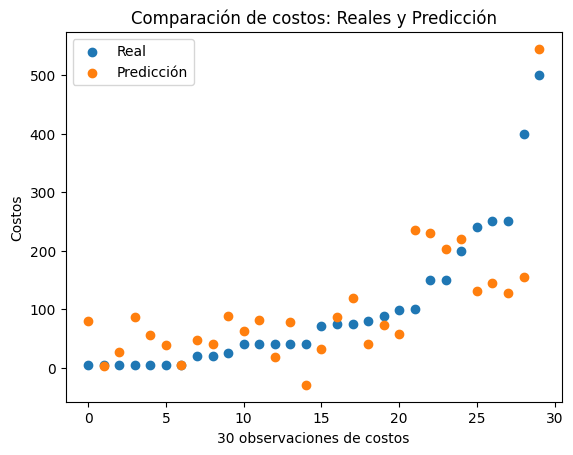

In [123]:
import matplotlib.pyplot as plt # importamos la librería pyplot que nos permitirá graficar
import numpy as np # importamos la librería numpy que nos permitirá crear un arreglo para la muestra de 30 datos

# función mágica para desplegar el gráfico en nuestra libreta
%matplotlib inline

plt.scatter(np.arange(30), residuals['Real'], label = "Real")  # creamos el gráfico con la muestra de datos reales
plt.scatter(np.arange(30), residuals['Predicción'], label = "Predicción")  # creamos el gráfico con la muestra de datos de predicción
plt.title("Comparación de costos: Reales y Predicción") # indicamos el título del gráfico
plt.xlabel("30 observaciones de costos") # indicamos la etiqueta del eje de las x
plt.ylabel("Costos") # indicamos la etiqueta del eje de las y
plt.legend(loc='upper left') # indicamos la posición de la etiqueta de los datos
plt.show() # desplegamos el gráfico